In [69]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

In [18]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [54]:
y = pd.read_csv('AAPL_quarterly_financials.csv')
y.index = y.name
y = pd.DataFrame(y.loc['BasicEPS',:]).iloc[2:,:]

In [55]:
y.index = pd.to_datetime(y.index)
#check if na are no dividend period
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [60]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession","Samsung","Interest Rates"\
            ,"New Phone", "Buy iPhone", "Sell iPhone",\
            "Taylor Swift Tickets","Hospital", "UCLA"]  
# Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    #time.sleep(5)
    pytrends.build_payload([keyword], cat=0,\
                           timeframe=f'{start_date} {end_date}',\
                           geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [61]:
X = df.resample('Q').mean()

In [62]:
# fix data
temp = pd.concat([y,X],axis =1).dropna()
y = temp[['BasicEPS']].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [63]:
X_scaled = scaler.fit_transform(X)

# 3.) Run a Lasso with lambda of .5. Plot a bar chart.

In [51]:
from sklearn.linear_model import Lasso

In [64]:
lasso = Lasso(alpha = 0.1)

In [65]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [67]:
coefficients = lasso.coef_

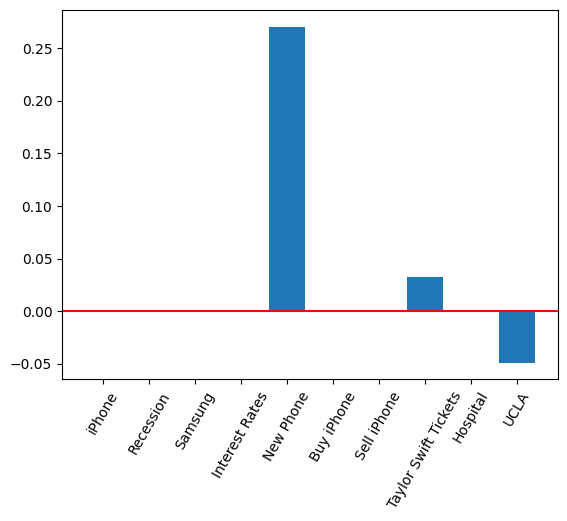

In [71]:
plt.bar(range(len(coefficients)), coefficients) 
plt.xticks(range(len(coefficients)), X.columns, rotation=60)
plt.axhline(0, color='red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?